# Phase 3 Data Science Training Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [2]:
# Assume tar.gz file to be extracted at project directory.
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
# read in the data batches
data_batch_1 = unpickle('.\\cifar-10-batches-py\\data_batch_1')
data_batch_2 = unpickle('.\\cifar-10-batches-py\\data_batch_2')
data_batch_3 = unpickle('.\\cifar-10-batches-py\\data_batch_3')
data_batch_4 = unpickle('.\\cifar-10-batches-py\\data_batch_4')
data_batch_5 = unpickle('.\\cifar-10-batches-py\\data_batch_5')
test_batch = unpickle('.\\cifar-10-batches-py\\test_batch')

In [4]:
# check the type and format of data we're dealing with
type(data_batch_1)
len(data_batch_1)
data_batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

Show shape of the datasets

In [5]:
# we can see that the set of images within each data_batch are represented as a 2d list
print(data_batch_1[b'data'])

# for each set of data_batch images (2d list) we have 10000 lists, where each list contains 3072 elements
print(data_batch_1[b'data'].shape)
print(data_batch_2[b'data'].shape)
print(data_batch_3[b'data'].shape)
print(data_batch_4[b'data'].shape)
print(data_batch_5[b'data'].shape)
print(test_batch[b'data'].shape)

[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [ 71  60  74 ...  68  69  68]
 [250 254 211 ... 215 255 254]
 [ 62  61  60 ... 130 130 131]]
(10000, 3072)
(10000, 3072)
(10000, 3072)
(10000, 3072)
(10000, 3072)
(10000, 3072)


In [6]:
# reshaping a single image
image = data_batch_1[b'data'][0]
image = image.reshape(3,32,32)
image

array([[[ 59,  43,  50, ..., 158, 152, 148],
        [ 16,   0,  18, ..., 123, 119, 122],
        [ 25,  16,  49, ..., 118, 120, 109],
        ...,
        [208, 201, 198, ..., 160,  56,  53],
        [180, 173, 186, ..., 184,  97,  83],
        [177, 168, 179, ..., 216, 151, 123]],

       [[ 62,  46,  48, ..., 132, 125, 124],
        [ 20,   0,   8, ...,  88,  83,  87],
        [ 24,   7,  27, ...,  84,  84,  73],
        ...,
        [170, 153, 161, ..., 133,  31,  34],
        [139, 123, 144, ..., 148,  62,  53],
        [144, 129, 142, ..., 184, 118,  92]],

       [[ 63,  45,  43, ..., 108, 102, 103],
        [ 20,   0,   0, ...,  55,  50,  57],
        [ 21,   0,   8, ...,  50,  50,  42],
        ...,
        [ 96,  34,  26, ...,  70,   7,  20],
        [ 96,  42,  30, ...,  94,  34,  34],
        [116,  94,  87, ..., 140,  84,  72]]], dtype=uint8)

(32, 32, 3)


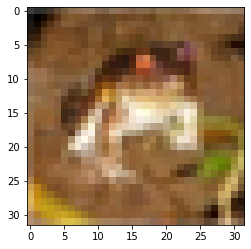

In [7]:
# transposing the same single image and displaying it
image = image.transpose(1,2,0)
print(image.shape)
plt.imshow(image)

(10000, 32, 32, 3)


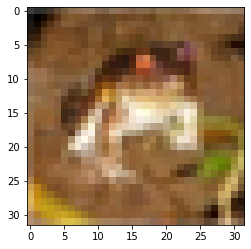

In [8]:
# reshaping/transposing the entire set of images for the first data_batch
data = data_batch_1[b'data']
data = data.reshape(len(data), 3, 32, 32,).transpose(0, 2, 3, 1)
print(data.shape)

# display first image to make sure its working
plt.imshow(data[0])

Rendering 5 images from each label

label: 0
label: 1
label: 2
label: 3
label: 4
label: 5
label: 6
label: 7
label: 8
label: 9


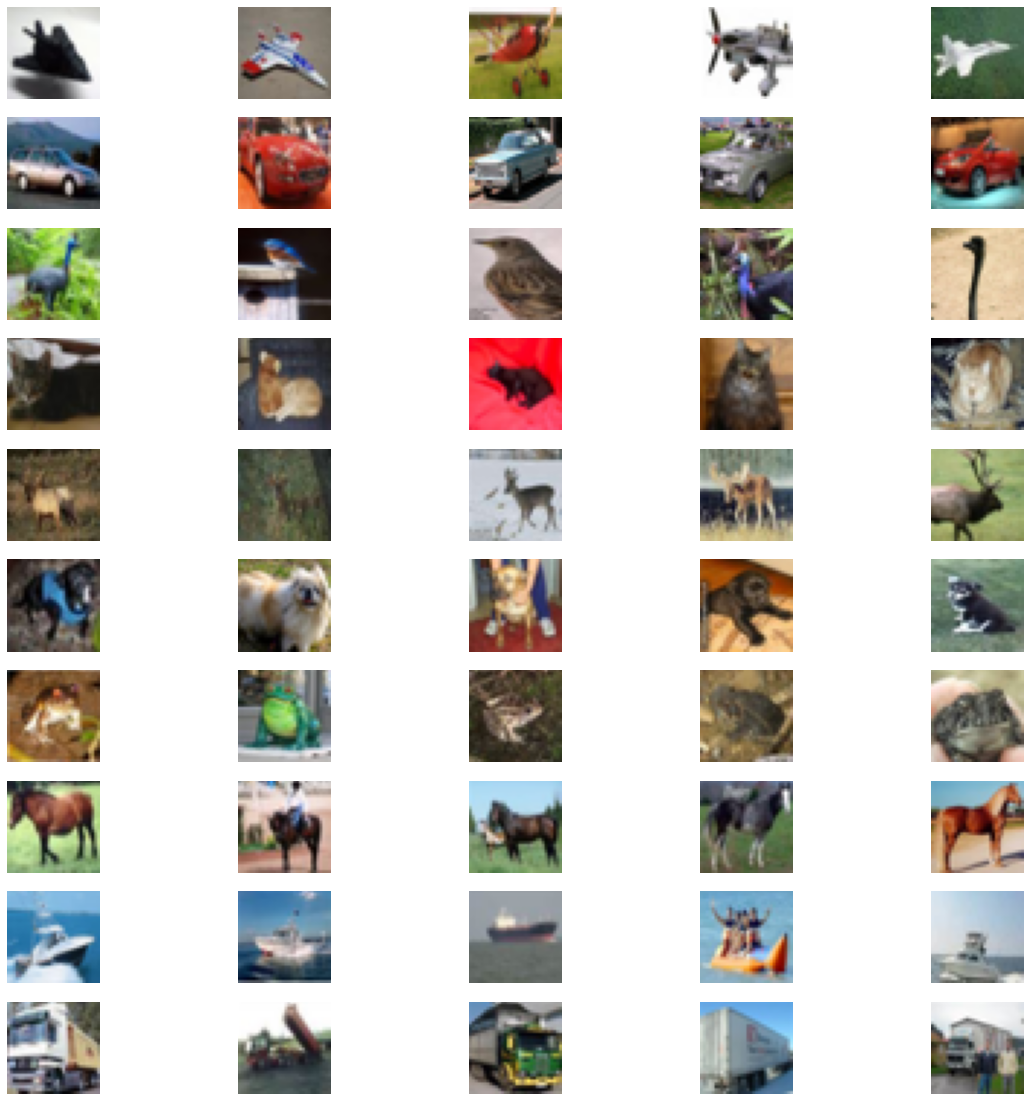

In [9]:
labels = data_batch_1[b'labels']
label_index_lists = [[],[],[],[],[],[],[],[],[],[]]

# for each label, store the first 5 indices of images corresponding to that label in a list
label_number = 0
for label_index_list in label_index_lists:
    for i in range(len(labels)):
        if labels[i] == label_number and len(label_index_list) < 5:
            label_index_list.append(i)
    label_number += 1

# plot the 5 images for each label
columns = 5
rows = 10
pos = 1
fig = plt.figure(figsize=(20,20))
for i in range(10):
    print(f'label: {i}')
    for j in range(5):
        fig.add_subplot(rows, columns, pos)
        plt.imshow(data[label_index_lists[i][j]])
        plt.axis('off')
        pos += 1
  
plt.show()

# Data Processing

Obtain training and testing dataset

In [10]:
# convert the image data in each batch to dataframes and combine them
df_1 = pd.DataFrame(data_batch_1[b'data'])
df_2 = pd.DataFrame(data_batch_2[b'data'])
df_3 = pd.DataFrame(data_batch_3[b'data'])
df_4 = pd.DataFrame(data_batch_4[b'data'])
df_5 = pd.DataFrame(data_batch_5[b'data'])
df_test = pd.DataFrame(test_batch[b'data'])

df_all = pd.concat([df_1, df_2, df_3, df_4, df_5])
df_all = df_all.values.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype("uint8")

In [11]:
# combine all the image labels into one list and create a dataframe out of it
labels = np.concatenate([data_batch_1[b'labels'], data_batch_2[b'labels'], data_batch_3[b'labels'], data_batch_4[b'labels'], data_batch_5[b'labels']])
df_labels = pd.DataFrame()
df_labels['labels'] = labels
df_labels['images'] = df_all
df_labels.shape

(50000, 2)

In [12]:
# get a list of all indices for horse images
horse_indices = []
for i in range(len(df_labels)):
    if df_labels['labels'][i] == 7:
        horse_indices.append(i)

In [13]:
# make a new dataframe for the set of training images that we will use to train our model to recognize horses
df_training_set = pd.DataFrame()

for i in horse_indices:
    df_training_set = df_training_set.append({'image': df_all[i], 'labels': df_labels['labels'][i]}, ignore_index=True)

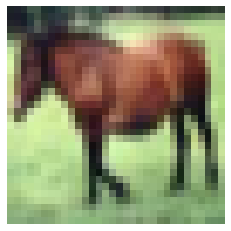

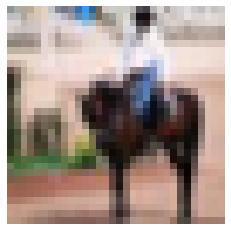

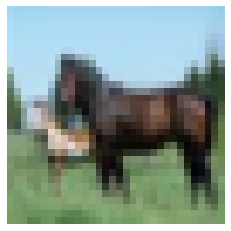

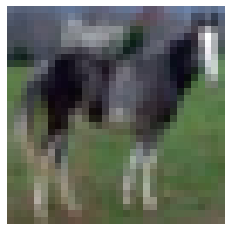

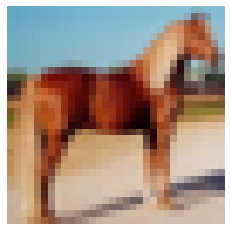

In [14]:
for i in range(5):
    plt.imshow(df_training_set['image'][i])
    plt.axis('off')
    plt.show()

In [15]:
# add 5000 more images to the training set dataframe from other labels
count = 0
for i in range(10000):
    # if i is in the horse_indices then skip it
    if i in horse_indices:
        continue
    # if we've added 5000 non-horse entries, then exit the loop
    if count == 5000:
        break
    else:
        df_training_set = df_training_set.append({'image': df_all[i], 'labels': df_labels['labels'][i]}, ignore_index=True)
        count += 1

# check that our training set has been created correctly
df_training_set['labels'].value_counts()

# training set should have a shape of 10000 x 2. The first 5 entries should have label 7, and the last 5 should be anything other than 7
print(df_training_set.shape)
print(df_training_set.head())
print(df_training_set.tail())

(10000, 2)
                                               image  labels
0  [[[28, 35, 39], [30, 34, 44], [33, 44, 47], [6...       7
1  [[[142, 149, 152], [172, 172, 167], [176, 168,...       7
2  [[[164, 215, 244], [162, 212, 240], [162, 212,...       7
3  [[[95, 105, 127], [88, 97, 120], [86, 96, 118]...       7
4  [[[99, 166, 198], [98, 165, 196], [100, 167, 1...       7
                                                  image  labels
9995  [[[92, 113, 137], [93, 114, 138], [92, 111, 13...       2
9996  [[[59, 57, 34], [70, 68, 41], [84, 83, 54], [9...       2
9997  [[[158, 108, 109], [166, 130, 124], [164, 126,...       3
9998  [[[237, 237, 237], [254, 254, 254], [254, 254,...       2
9999  [[[233, 240, 248], [237, 244, 252], [237, 244,...       3


In [16]:
# make a new dataframe for the set of testing images that we will use to test our model
df_testing_set = pd.DataFrame()

In [17]:
# reshape df_test so that it's values are 32x32 uint8 images
df_test = df_test.values.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype("uint8")

In [18]:
# add 1000 horse images from df_test to the model's testing set
count = 0
for i in range(len(test_batch[b'labels'])):
    if count == 1000:
        break
    if test_batch[b'labels'][i] == 7:
        df_testing_set = df_testing_set.append({'image': df_test[i], 'labels': test_batch[b'labels'][i]}, ignore_index=True)
        count += 1

print(df_testing_set.shape) # shape should be 1000 x 2

(1000, 2)


In [19]:
# add 1000 images that aren't horses from df_test to the model's testing set
count = 0
for i in range(len(test_batch[b'labels'])):
    if count == 1000:
        break
    if test_batch[b'labels'][i] != 7:
        df_testing_set = df_testing_set.append({'image': df_test[i], 'labels': test_batch[b'labels'][i]}, ignore_index=True)
        count += 1

# check that our training set has been created correctly
df_testing_set['labels'].value_counts()
print(df_testing_set.shape) # shape should now be 2000 x 2

(2000, 2)


# Data Modelling

In [20]:
import tensorflow as tf
from keras import Input, layers, Sequential, optimizers, losses, callbacks
from datetime import datetime

In [21]:
# change all label 7's to 1 and all other labels to 0 in both the training/test sets. label 1 = horse, label 0 = not a horse
df_training_set['labels'] = df_training_set['labels'].apply(lambda x: 1 if x == 7 else 0)
df_testing_set['labels'] = df_testing_set['labels'].apply(lambda x: 1 if x == 7 else 0)

# verify the changes have been made
print(df_training_set['labels'].value_counts())
print(df_testing_set['labels'].value_counts())

1    5000
0    5000
Name: labels, dtype: int64
1    1000
0    1000
Name: labels, dtype: int64


In [22]:
# split the training set into x and y train variables
x_train = df_training_set['image']
y_train = df_training_set['labels']

# split the testing set into x and y test variables
x_test = df_testing_set['image']
y_test = df_testing_set['labels']

In [23]:
# to train the model we need our image data to be converted to a list which we will achieve with this helper function
def convert_to_list(model_sets):
    list = []
    for i in range(len(model_sets)):
        list.append(np.array(model_sets[i]))
    return list

In [24]:
x_train = convert_to_list(x_train)
x_train = np.array(x_train)
x_test = convert_to_list(x_test)
x_test = np.array(x_test)

print(x_train.shape) # should be a list of 10000 32 x 32 uint8 images
print(x_test.shape) # should be a list of 2000 32 x 32 uint8 images

(10000, 32, 32, 3)
(2000, 32, 32, 3)


In [25]:
def generateModel(hp=None):
    """
    Make a Keras Sequential Model.
    Feel free to change the layout of the layers.

    Read more about keras here: https://keras.io/api/
    Tensorflow setup adapted here: https://www.tensorflow.org/tutorials/quickstart/beginner
    """
    model = Sequential(name="Image_Recognition_Model")
    model.add(Input(shape=(32,32,3))) # Input layer.

    model.add(layers.Rescaling(scale=1./255, name="Normaliser")) # Example pre-processing layer.

    # Adding convolutional layers
    model.add(layers.Conv2D(64, (3,3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation="relu"))

    model.add(layers.Dense(1, activation="sigmoid", name="Output_Probability")) # Output layer.

    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.0001),
        loss=losses.BinaryCrossentropy(),
        metrics=['accuracy']
    )

    return model

In [26]:
generateModel().summary()

Model: "Image_Recognition_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Normaliser (Rescaling)      (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 128)               1843328   
                                                                 
 Output_Probability (Dense)  (None, 1)                 129       
                                           

In [27]:
model = generateModel()

log_dir = 'output\\logs\\'

# Callbacks for QoL.
tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    batch_size=1000, # Set this to a lower number if your computer spec is bad.
    callbacks=[tensorboard_callback, earlystop_callback],
    # verbose=0 # Uncomment this line to reduce the printing on console.
)

Epoch 1/20
10/10 [==============================] - 8s 746ms/step - loss: 0.6711 - accuracy: 0.5901 - val_loss: 0.6554 - val_accuracy: 0.6290
Epoch 2/20
10/10 [==============================] - 7s 671ms/step - loss: 0.6341 - accuracy: 0.6554 - val_loss: 0.6263 - val_accuracy: 0.6400
Epoch 3/20
10/10 [==============================] - 7s 693ms/step - loss: 0.6086 - accuracy: 0.6714 - val_loss: 0.6133 - val_accuracy: 0.6640
Epoch 4/20
10/10 [==============================] - 7s 714ms/step - loss: 0.5868 - accuracy: 0.6945 - val_loss: 0.5822 - val_accuracy: 0.6960
Epoch 5/20
10/10 [==============================] - 7s 702ms/step - loss: 0.5640 - accuracy: 0.7166 - val_loss: 0.5616 - val_accuracy: 0.7045
Epoch 6/20
10/10 [==============================] - 7s 679ms/step - loss: 0.5451 - accuracy: 0.7374 - val_loss: 0.5447 - val_accuracy: 0.7405
Epoch 7/20
10/10 [==============================] - 8s 791ms/step - loss: 0.5268 - accuracy: 0.7502 - val_loss: 0.5266 - val_accuracy: 0.7395
Epoch 

In [28]:
model.save('output\\my_model')

INFO:tensorflow:Assets written to: output\my_model\assets


INFO:tensorflow:Assets written to: output\my_model\assets


In [29]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 1s 9ms/step - loss: 0.4346 - accuracy: 0.8145


[0.4345543086528778, 0.8144999742507935]

# Advanced Features

Takes an image, resizes it to 32 x 32 and uses the model to validate whether or not it is a horse

In [30]:
from PIL import Image

In [31]:

def evaluate_image(image):
    # read in the image and evaluate it with our model
    image = image.resize((32,32), Image.ANTIALIAS)
    image = np.array(image)
    image = image[:,:,:3]
    image = image.reshape(32, 32, 3)
    return model.predict(np.array([image]))

(-0.5, 641.5, 636.5, -0.5)

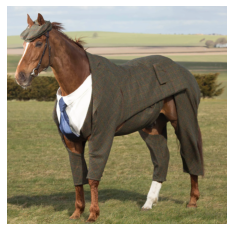

In [32]:
# load the image from image folder
horse_image = Image.open('image/horse.PNG')
plt.imshow(horse_image)
plt.axis('off')

In [33]:
evaluate_image(horse_image)

1/1 [==============================] - 0s 106ms/step


array([[0.9152115]], dtype=float32)

The model has predicted with >90% confidence that the given photo was a horse which is generally a good result, especially when you consider the fact that it's wearing a suit.

# Hyperparameter Tuning

In [34]:
def evaluate_model(model, X_test, y_test):
    # evaluate the test set with our model and return a dataframe with the results
    eval_dict = model.evaluate(X_test, y_test, return_dict=True)
    model_df = pd.DataFrame([eval_dict.values()], columns=[list(eval_dict.keys())])
    return model_df

In [35]:
import keras_tuner as kt

In [36]:
results = evaluate_model(model, x_test, y_test)

63/63 [==============================] - 1s 8ms/step - loss: 0.4346 - accuracy: 0.8145


In [37]:
# create tuner object with our model and validation data
tuner = kt.RandomSearch(
    generateModel,
    objective='val_accuracy',
    max_trials=20,
    directory='output\\new_model',
    project_name='new_final')

tuner.search(x_train, y_train,
             epochs=20,
             validation_data=(x_test, y_test))

Trial 1 Complete [00h 03m 10s]
val_accuracy: 0.8634999990463257

Best val_accuracy So Far: 0.8634999990463257
Total elapsed time: 00h 03m 10s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [38]:
# find best possible model compilation parameters for accuracy
best_hyper_params = tuner.get_best_hyperparameters()[0]

# create model with these new best parameters
new_model = tuner.hypermodel.build(best_hyper_params)

In [39]:
# train model with best parameters
new_model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=20,
          batch_size=1000, # Set this to a lower number if your computer spec is bad.
          callbacks=[tensorboard_callback, earlystop_callback],
          verbose=0 # Uncomment this line to reduce the printing on console.
          )

In [40]:
new_model_df = evaluate_model(new_model, x_test, y_test)

63/63 [==============================] - 1s 8ms/step - loss: 0.4217 - accuracy: 0.8160


In [41]:
# set index name to new_model and append to results
new_model_df.index = ['new_model']
results = results.append(new_model_df)

In [42]:
# set 0th index name to original_model
results.index = ['original model', 'new_model']

# display results dataframe
results

,loss,accuracy
original model,0.434554,0.8145
new_model,0.421673,0.8160


The new tuned model has a higher accuracy than the original model which is expected when we consider that both models were trained for 20 epochs/iterations, but the new model had tuned parameters.